In [1]:
# import libraries we will work with today

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# read cleaned data

ceo_data = pd.read_excel("../data/cleaned/CEO_data_cleaned.xlsx")

In [3]:
# preview data
# if you see an unamed column, there was a mistake when saving the data 
# add index = False to the to_excel function

ceo_data.head()

,Annual Report Year,Sector,Company Name,Company Ticker,Company Index,Individual Name,Individual Role,Time in Role,Age (Yrs),Number of Qualifications,...,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
0,2009-01-01,General Retailers,TED BAKER PLC,TED,FTSE 250(GBP),Raymond (Ray) Stuart Kelvin,CEO,21.0,53.0,0,...,272,0.0,NaN,11.0,272,283,721.0,993,57467.0,58514.0
1,2009-01-01,General Retailers,NEXT PLC,NXT,FTSE 100 (GBP),Lord (Simon Adam) Wolfson of Aspley Guise,CEO,7.4,41.0,2,...,675,123.0,NaN,33.0,798,831,1581.0,2379,17597.0,19531.0
2,2009-01-01,Engineering & Machinery,MORGAN ADVANCED MATERIALS PLC (Morgan Crucible...,MGAM,FTSE 250(GBP),Mark Robertshaw,CEO,2.4,40.0,1,...,440,264.0,108.0,13.0,704,825,781.0,1485,405.0,2666.0
3,2009-01-01,General Retailers,KINGFISHER PLC,KGF,FTSE 100 (GBP),Sir Ian Michael Cheshire,Group CEO,1.0,49.0,2,...,800,802.0,205.0,35.0,1602,1842,35.0,1637,522.0,4733.0
4,2009-01-01,General Retailers,JD SPORTS FASHION PLC (John David Group prior ...,JD.,FTSE 250(GBP),Barry Colin Bown,CEO,8.5,47.0,0,...,283,285.0,22.0,301.0,568,891,NaN,568,12.0,260.0


In [4]:
pd.set_option('display.max_columns', 500) # you can use this to view all columns

ceo_data.head()

,Annual Report Year,Sector,Company Name,Company Ticker,Company Index,Individual Name,Individual Role,Time in Role,Age (Yrs),Number of Qualifications,Gender,Nationality Mix,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
0,2009-01-01,General Retailers,TED BAKER PLC,TED,FTSE 250(GBP),Raymond (Ray) Stuart Kelvin,CEO,21.0,53.0,0,M,British,272,0.0,NaN,11.0,272,283,721.0,993,57467.0,58514.0
1,2009-01-01,General Retailers,NEXT PLC,NXT,FTSE 100 (GBP),Lord (Simon Adam) Wolfson of Aspley Guise,CEO,7.4,41.0,2,M,British,675,123.0,NaN,33.0,798,831,1581.0,2379,17597.0,19531.0
2,2009-01-01,Engineering & Machinery,MORGAN ADVANCED MATERIALS PLC (Morgan Crucible...,MGAM,FTSE 250(GBP),Mark Robertshaw,CEO,2.4,40.0,1,M,British,440,264.0,108.0,13.0,704,825,781.0,1485,405.0,2666.0
3,2009-01-01,General Retailers,KINGFISHER PLC,KGF,FTSE 100 (GBP),Sir Ian Michael Cheshire,Group CEO,1.0,49.0,2,M,British,800,802.0,205.0,35.0,1602,1842,35.0,1637,522.0,4733.0
4,2009-01-01,General Retailers,JD SPORTS FASHION PLC (John David Group prior ...,JD.,FTSE 250(GBP),Barry Colin Bown,CEO,8.5,47.0,0,M,British,283,285.0,22.0,301.0,568,891,NaN,568,12.0,260.0


In [5]:
# remind yourself... how big is the data set

ceo_data.shape

(1816, 22)

In [6]:
# remind yourself the different fields in the data sets

ceo_data.info()

# Let's start by exploring the variables with data type object and datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Annual Report Year                 1816 non-null   datetime64[ns]
 1   Sector                             1816 non-null   object        
 2   Company Name                       1816 non-null   object        
 3   Company Ticker                     1816 non-null   object        
 4   Company Index                      1816 non-null   object        
 5   Individual Name                    1816 non-null   object        
 6   Individual Role                    1816 non-null   object        
 7   Time in Role                       1816 non-null   float64       
 8   Age (Yrs)                          1811 non-null   float64       
 9   Number of Qualifications           1816 non-null   int64         
 10  Gender                             1

In [7]:
# for reference -- the variables we are going to explore

list(ceo_data.select_dtypes(["float64", "int64"]).columns)

['Time in Role',
 'Age (Yrs)',
 'Number of Qualifications',
 'Salary',
 'Bonus',
 'D.C Pension',
 'Other',
 'Total Salary+Bonus',
 'Total Inc. D.C. Pension & Other',
 'Total Equity Linked Compensation ',
 'Total Annual Compensation ',
 'Liquid Wealth',
 'Total Wealth']

In [8]:
# we can use the describe function that gives us summary statistics for all numerical variables

ceo_data.describe()

,Annual Report Year,Time in Role,Age (Yrs),Number of Qualifications,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
count,1816,1816.000000,1811.000000,1816.000000,1816.000000,1793.000000,1339.000000,1764.000000,1816.000000,1816.000000,1545.000000,1816.000000,1.705000e+03,1.784000e+03
mean,2012-09-22 00:00:47.577092608,5.732654,52.130315,1.799559,588.210903,574.955940,153.414488,131.054422,1155.873348,1396.284692,2076.041424,2922.105176,3.942960e+04,4.379154e+04
min,2009-01-01 00:00:00,0.000000,34.000000,0.000000,12.000000,0.000000,1.000000,0.000000,15.000000,16.000000,0.000000,15.000000,1.000000e+00,1.700000e+01
25%,2010-12-01 00:00:00,1.900000,48.000000,1.000000,415.750000,158.000000,54.000000,16.000000,636.750000,751.500000,666.000000,1172.750000,7.920000e+02,3.175250e+03
50%,2012-12-01 00:00:00,4.300000,52.000000,2.000000,530.000000,420.000000,110.000000,27.000000,950.000000,1107.500000,1261.000000,2090.000000,2.566000e+03,7.253000e+03
75%,2014-06-01 00:00:00,7.500000,56.000000,2.000000,748.250000,750.000000,189.000000,59.250000,1424.250000,1681.000000,2389.000000,3633.000000,7.657000e+03,1.709525e+04
max,2015-12-01 00:00:00,39.400000,79.000000,6.000000,2213.000000,7900.000000,8355.000000,73784.000000,8400.000000,74875.000000,64755.000000,65930.000000,4.286202e+06,4.286202e+06
std,NaN,5.600542,6.203423,1.130357,271.078511,672.432196,279.867266,1774.576591,800.464081,1971.587843,2979.989917,3246.055031,2.134827e+05,2.089753e+05


In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) # fix the display

ceo_data.describe()

# handy function but can feel very overwhelming

,Annual Report Year,Time in Role,Age (Yrs),Number of Qualifications,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
count,1816,1816.00000,1811.00000,1816.00000,1816.00000,1793.00000,1339.00000,1764.00000,1816.00000,1816.00000,1545.00000,1816.00000,1705.00000,1784.00000
mean,2012-09-22 00:00:47.577092608,5.73265,52.13031,1.79956,588.21090,574.95594,153.41449,131.05442,1155.87335,1396.28469,2076.04142,2922.10518,39429.60059,43791.53868
min,2009-01-01 00:00:00,0.00000,34.00000,0.00000,12.00000,0.00000,1.00000,0.00000,15.00000,16.00000,0.00000,15.00000,1.00000,17.00000
25%,2010-12-01 00:00:00,1.90000,48.00000,1.00000,415.75000,158.00000,54.00000,16.00000,636.75000,751.50000,666.00000,1172.75000,792.00000,3175.25000
50%,2012-12-01 00:00:00,4.30000,52.00000,2.00000,530.00000,420.00000,110.00000,27.00000,950.00000,1107.50000,1261.00000,2090.00000,2566.00000,7253.00000
75%,2014-06-01 00:00:00,7.50000,56.00000,2.00000,748.25000,750.00000,189.00000,59.25000,1424.25000,1681.00000,2389.00000,3633.00000,7657.00000,17095.25000
max,2015-12-01 00:00:00,39.40000,79.00000,6.00000,2213.00000,7900.00000,8355.00000,73784.00000,8400.00000,74875.00000,64755.00000,65930.00000,4286202.00000,4286202.00000
std,NaN,5.60054,6.20342,1.13036,271.07851,672.43220,279.86727,1774.57659,800.46408,1971.58784,2979.98992,3246.05503,213482.72241,208975.28361


### Questions for the group to answer:
- What is the average time in the role?
- What is the average age of the CEO?
- What is the average number of qualifications of the CEO?
- There are lots of columns on financial compensation - salary, bonus, pension, equity. Which variables should we use to understand the salary . Also safe to assume the salary is in 000s.
- What is the average salary of the a CEO and the average annual compensation of a CEO?
- Do any of these variables differ from the median (the 50th percentile)?

In [10]:
print("Average Time in Roles of the CEO", round(ceo_data["Time in Role"].mean(), 2))
print("Average Age of the CEO", round(ceo_data["Age (Yrs)"].mean(), 2))
print("Average Qualifications of the CEO", round(ceo_data["Number of Qualifications"].mean(), 2))
print("Average Salary of the CEO", round(ceo_data["Salary"].mean()*1000, 2))
print("Average Compensation of the CEO", round(ceo_data["Total Annual Compensation "].mean()*1000, 2))

# should have cleaned the column name in our data cleaning

Average Time in Roles of the CEO 5.73
Average Age of the CEO 52.13
Average Qualifications of the CEO 1.8
Average Salary of the CEO 588210.9
Average Compensation of the CEO 2922105.18


In [11]:
ceo_data.rename({'Total Annual Compensation ': 'Total Annual Compensation'}, axis=1, inplace = True)

In [12]:
print("Median Time in Roles of the CEO", round(ceo_data["Time in Role"].median(), 2))
print("Median Age of the CEO", round(ceo_data["Age (Yrs)"].median(), 2))
print("Median Qualifications of the CEO", round(ceo_data["Number of Qualifications"].median(), 2))
print("Median Salary of the CEO", round(ceo_data["Salary"].median(), 2))
print("Median Compensation of the CEO", round(ceo_data["Total Annual Compensation"].median(), 2))

# Time of Role and Average Salary have varying mean and median

Median Time in Roles of the CEO 4.3
Median Age of the CEO 52.0
Median Qualifications of the CEO 2.0
Median Salary of the CEO 530.0
Median Compensation of the CEO 2090.0


In [13]:
# before we investigate further, remember there are multiple rows of data for the same CEO
# should we double check if these values change

print("Average Time in Roles of the CEO:", round(ceo_data.groupby(["Individual Name"])["Time in Role"].mean().mean(), 2))
print("Average Age of the CEO:", round(ceo_data.groupby(["Individual Name"])["Age (Yrs)"].mean().mean(), 2))
print("Average Qualifications of the CEO:", round(ceo_data.groupby(["Individual Name"])["Number of Qualifications"].mean().mean(), 2))
print("Average Salary of the CEO:", round(ceo_data.groupby(["Individual Name"])["Salary"].mean().mean()*1000, 2))
print("Average Compensation of the CEO:", round(ceo_data.groupby(["Individual Name"])["Total Annual Compensation"].mean().mean()*1000, 2))

# Aside from time in roles, the values do not change so much so we dont to aggregrate the data 


Average Time in Roles of the CEO: 4.74
Average Age of the CEO: 52.51
Average Qualifications of the CEO: 1.77
Average Salary of the CEO: 584684.78
Average Compensation of the CEO: 2858529.73


Text(0.5, 1.0, 'The Distribution of Time in Role')

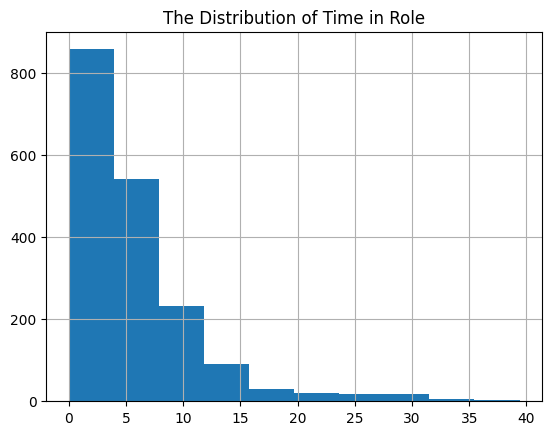

In [14]:
# visualising the distribution of time in role

ceo_data["Time in Role"].hist()
plt.title("The Distribution of Time in Role");

# histograms give us the distribution of the variable - the data is skewed towards ceo being in the role for 0 - 5 years;

Text(0.5, 1.0, 'The Distribution of Time in Role')

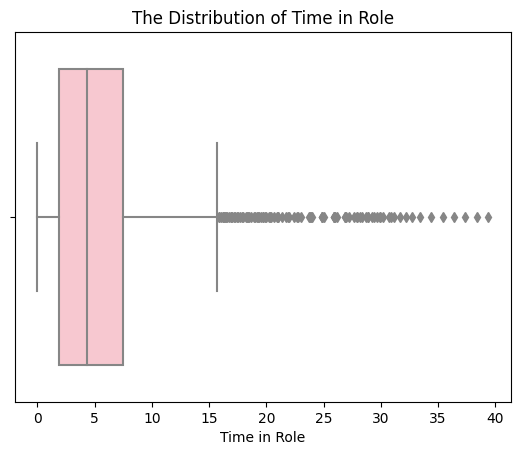

In [15]:
sns.boxplot(x = ceo_data["Time in Role"], color='pink')
plt.title("The Distribution of Time in Role")

# boxplots also summarise the distribution of the variable, but gives us information on "outliers" in the data;

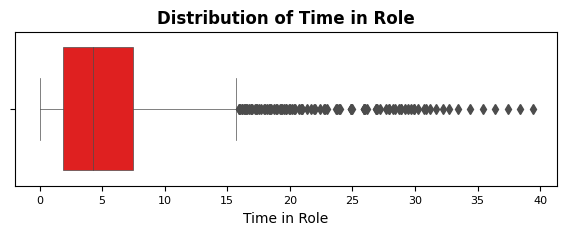

In [16]:
# Code to format the box plot
plt.figure(figsize=(7, 2))
sns.boxplot(x = ceo_data["Time in Role"], color='red', linewidth=0.5)
plt.tick_params(labelsize=8, rotation=0)
plt.title('Distribution of Time in Role', size=12, weight='bold');

# what conclusions can you draw about time in role?

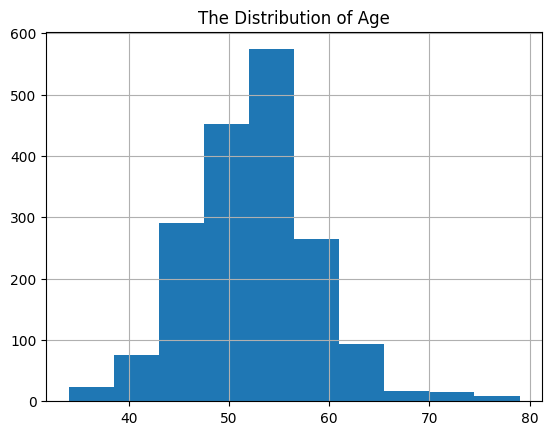

In [20]:
# Can you visualise the distribution of age?
# What conclusions can you draw?



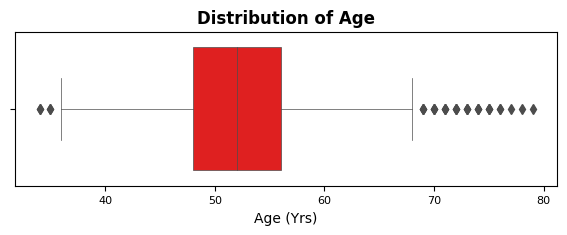

In [18]:
# Can you visualise the distribution of the Number of Qualifications?
# What conclusions can you draw?

In [ ]:
# Can you visualise the distribution of the Salary?
# What conclusions can you draw?

In [ ]:
# Can you visualise the distribution of Compensation?
# What conclusions can you draw?

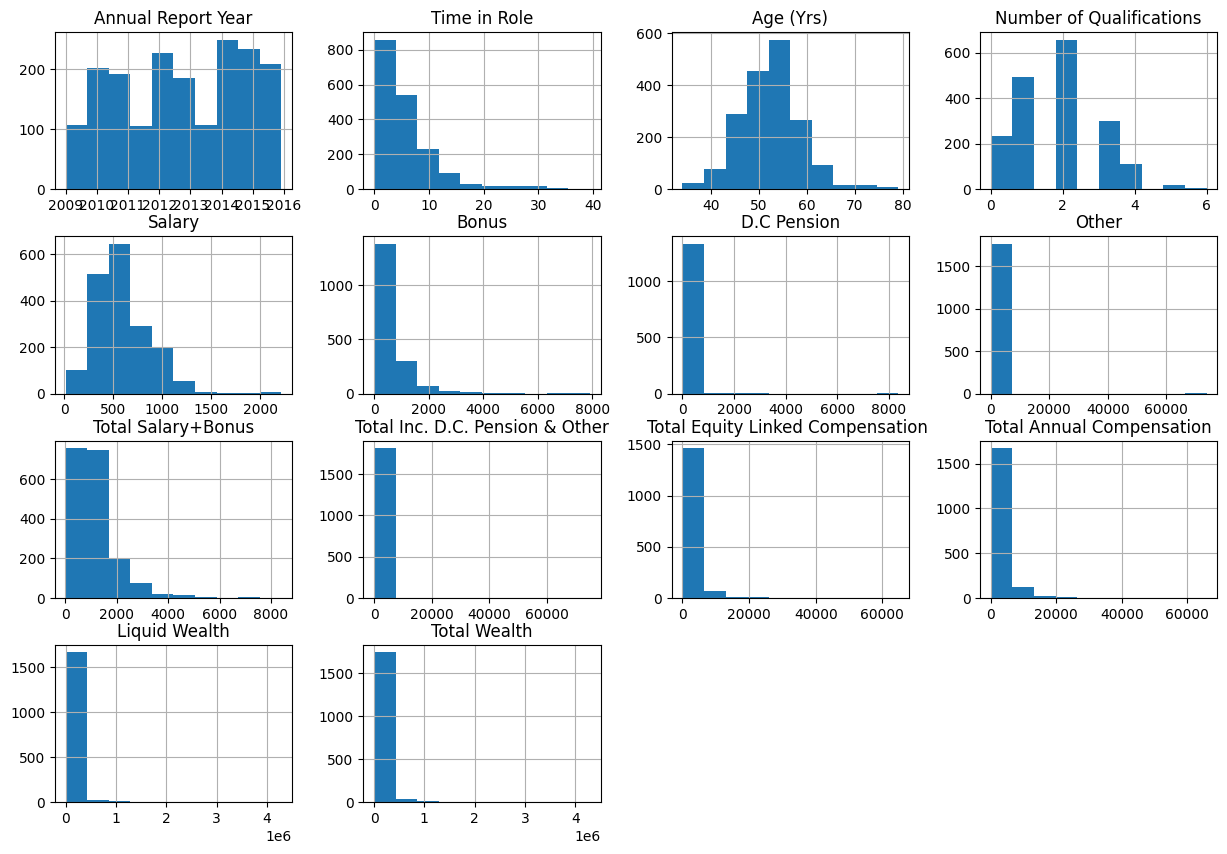

In [22]:
ceo_data.hist(figsize=(15,10));

# handy bit of code that plots histogram all the numerical variables for you

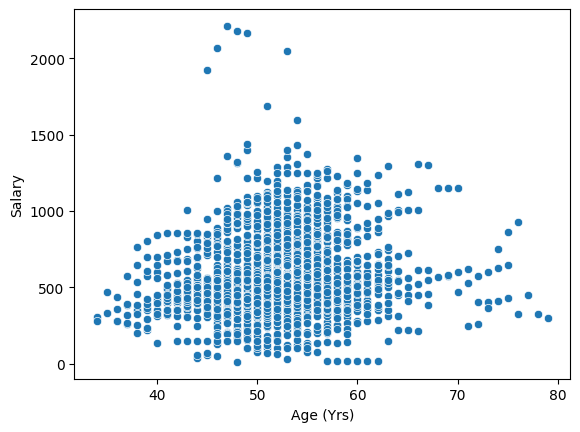

In [24]:
# is there a relationship between age and salary?

sns.scatterplot(x ="Age (Yrs)", y="Salary", data=ceo_data);

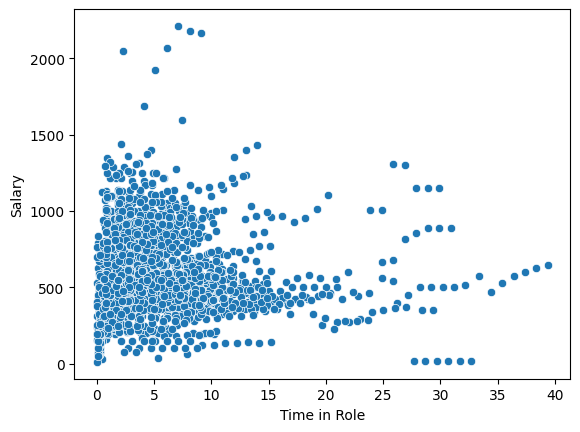

In [25]:
# is there a relationship between time in role and salary?


In [ ]:
# is there a relationship between age and salary?

In [ ]:
# is there a relationship between number of qualifications and salary?

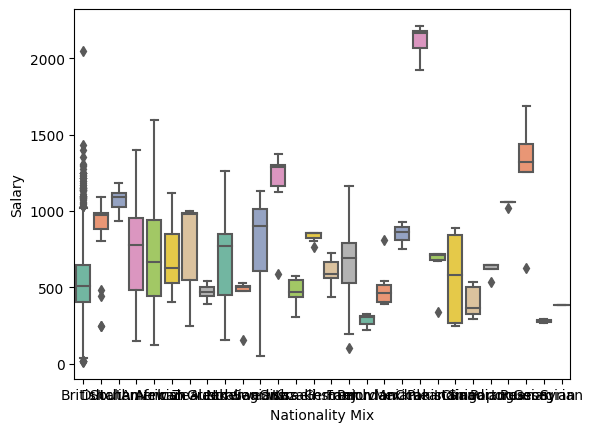

In [ ]:
sns.pairplot(ceo_data);

In [27]:
# best way to understand the relationship between all the different numerical variables is with a correlation matrix

corr_matrix = ceo_data.corr(numeric_only = True)
corr_matrix

# A scatterplot displays the strength, direction, and form of the relationship between two quantitative variables. 
# A correlation coefficient measures the strength of that relationship.

# Which variables have the highest correlation?

,Time in Role,Age (Yrs),Number of Qualifications,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
Time in Role,1.00000,0.37231,0.01657,-0.03617,0.09690,0.01061,0.02384,0.06406,0.04296,0.01151,0.00962,0.10640,0.11211
Age (Yrs),0.37231,1.00000,0.06302,0.14241,0.08763,0.12114,0.03880,0.11619,0.09181,0.06608,0.07610,0.07837,0.08337
Number of Qualifications,0.01657,0.06302,1.00000,0.17034,0.05987,0.06413,0.00737,0.10652,0.05846,0.08898,0.11542,0.00630,0.01101
Salary,-0.03617,0.14241,0.17034,1.00000,0.32809,0.37966,0.02279,0.60756,0.30438,0.40112,0.46947,0.04407,0.06240
Bonus,0.09690,0.08763,0.05987,0.32809,1.00000,0.15204,0.01269,0.94761,0.40935,0.39741,0.52030,0.09030,0.13257
D.C Pension,0.01061,0.12114,0.06413,0.37966,0.15204,1.00000,0.05394,0.25134,0.51337,0.12593,0.17978,-0.03677,-0.02911
Other,0.02384,0.03880,0.00737,0.02279,0.01269,0.05394,1.00000,0.01862,0.89707,0.00392,0.01079,-0.00864,-0.00861
Total Salary+Bonus,0.06406,0.11619,0.10652,0.60756,0.94761,0.25134,0.01862,1.00000,0.44703,0.45529,0.59185,0.02428,0.05014
Total Inc. D.C. Pension & Other,0.04296,0.09181,0.05846,0.30438,0.40935,0.51337,0.89707,0.44703,1.00000,0.17909,0.27083,-0.00447,0.00703
Total Equity Linked Compensation,0.01151,0.06608,0.08898,0.40112,0.39741,0.12593,0.00392,0.45529,0.17909,1.00000,0.98106,0.03421,0.12502


In [47]:
# option 1 

corr_matrix.style.background_gradient(cmap='Blues')

,Time in Role,Age (Yrs),Number of Qualifications,Salary,Bonus,D.C Pension,Other,Total Salary+Bonus,Total Inc. D.C. Pension & Other,Total Equity Linked Compensation,Total Annual Compensation,Liquid Wealth,Total Wealth
Time in Role,1.000000,0.372312,0.016570,-0.036165,0.096895,0.010607,0.023840,0.064063,0.042962,0.011510,0.009623,0.106403,0.112113
Age (Yrs),0.372312,1.000000,0.063020,0.142410,0.087627,0.121138,0.038801,0.116190,0.091807,0.066078,0.076104,0.078366,0.083371
Number of Qualifications,0.016570,0.063020,1.000000,0.170342,0.059869,0.064134,0.007370,0.106521,0.058460,0.088975,0.115424,0.006295,0.011009
Salary,-0.036165,0.142410,0.170342,1.000000,0.328088,0.379660,0.022789,0.607563,0.304384,0.401118,0.469474,0.044069,0.062399
Bonus,0.096895,0.087627,0.059869,0.328088,1.000000,0.152044,0.012694,0.947610,0.409351,0.397409,0.520304,0.090297,0.132570
D.C Pension,0.010607,0.121138,0.064134,0.379660,0.152044,1.000000,0.053943,0.251342,0.513372,0.125931,0.179776,-0.036769,-0.029113
Other,0.023840,0.038801,0.007370,0.022789,0.012694,0.053943,1.000000,0.018617,0.897071,0.003919,0.010789,-0.008640,-0.008606
Total Salary+Bonus,0.064063,0.116190,0.106521,0.607563,0.947610,0.251342,0.018617,1.000000,0.447031,0.455286,0.591854,0.024284,0.050143
Total Inc. D.C. Pension & Other,0.042962,0.091807,0.058460,0.304384,0.409351,0.513372,0.897071,0.447031,1.000000,0.179087,0.270834,-0.004473,0.007027
Total Equity Linked Compensation,0.011510,0.066078,0.088975,0.401118,0.397409,0.125931,0.003919,0.455286,0.179087,1.000000,0.981062,0.034209,0.125020


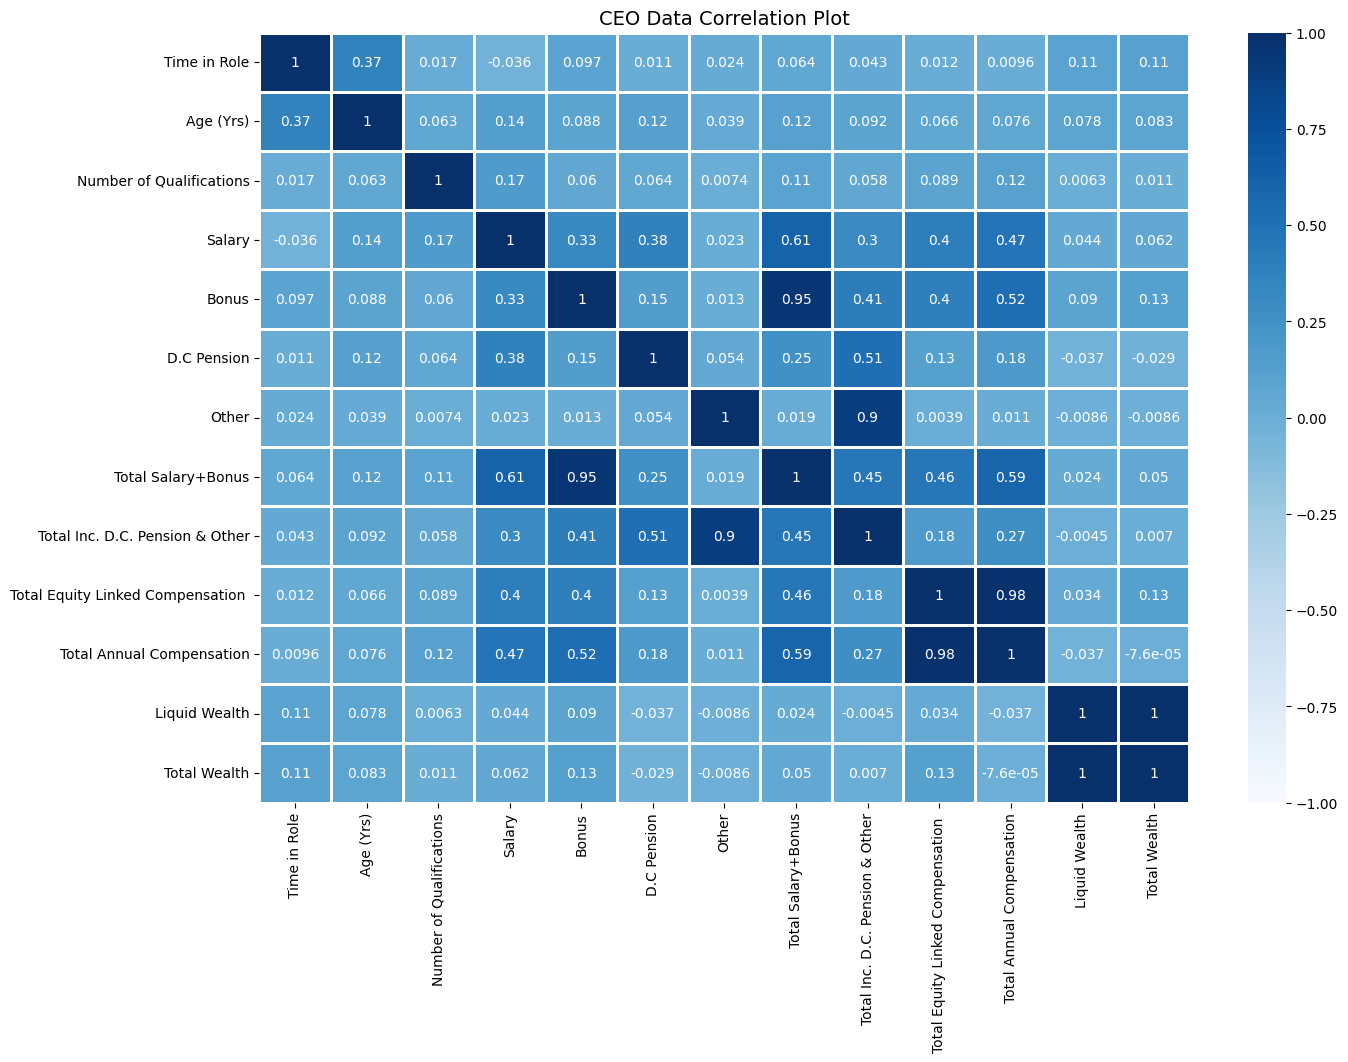

In [76]:
# option 2

plt.figure(figsize=(15, 10))

sns.heatmap(corr_matrix, 
            cmap="Blues", 
            linewidth=0.75,
            linecolor='white',
            # cbar=False,
            # cbar_kws={"orientation": "horizontal"},
            vmin=-1, 
            vmax=1,
            annot=True,
            annot_kws={"size": 10, "color": "white"}
           )

plt.title("CEO Data Correlation Plot", size=14);

# which variables are highly correlated?

Summarise our explorations:
- ???